In [141]:
import numpy as np
import pandas as pd
import os
from utils.config import path_dir_descriptor, path_dir_data, path_dir_tsOutput, Poly_degree, path_file_mapping
from datapre.preprocessTools import loadTrainingDataFeatures
from sklearn import preprocessing
# Load feature matrix

iD, X = loadTrainingDataFeatures(isNormalized=True)

In [142]:

print(iD)
print(iD.size)
print(X)
print(X.shape)

[['Sub-A_CA-A_Hyd-A_LigS-A']
 ['Sub-A_CA-A_Hyd-A_LigS-B']
 ['Sub-A_CA-A_Hyd-A_LigS-C']
 ...
 ['Sub-AC_Base-E_Oxo-F_LigA-D']
 ['Sub-AC_Base-E_Oxo-F_LigA-E']
 ['Sub-AC_Base-E_Oxo-F_LigA-F']]
41760
[[-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  8.95951640e-01
  -3.28329459e-01  3.46483461e-01]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  1.65038990e+00
  -2.18564586e+00 -1.81874912e+00]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  5.49305691e-01
  -1.22838386e-03  6.76394299e-01]
 ...
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.87182068e+00
   3.63075174e-01  5.76187736e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.08770845e+00
   6.50166031e-01  4.23565433e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ...  7.11163721e-01
   1.28541597e+00  1.19477056e-02]]
(41760, 32)


In [143]:

def createSubSet(X, nsample = 10000):
    idx = np.random.randint(X.shape[0], size=nsample)
    return X[idx,:]

def visualize3D(X, colors=0):
    if colors is visualize3D.__defaults__[0]:
        colors = np.zeros(X.shape[0], dtype=int)
    fig = plt.figure(1, figsize=(8, 8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)
    plt.cla()
    pca3 = PCA(n_components=3)
    pca3.fit(X)
    X2 = pca3.transform(X)
    #ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], cmap=plt.cm.nipy_spectral, edgecolor='k')
    ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c = colors, cmap='winter', edgecolor='k')
    plt.show()
    
def visualize2D(X, colors=0):
    if colors is visualize3D.__defaults__[0]:
        colors = np.zeros(X.shape[0], dtype=int)
    pca2 = PCA(n_components=2)
    pca2.fit(X)
    X2 = pca2.transform(X)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.scatter(X2[:, 0]
               , X2[:,1]
               , c = colors
               , s = 50)
    ax.grid()
    plt.show()

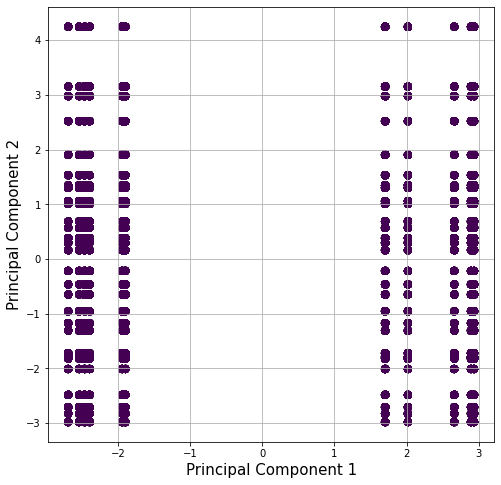

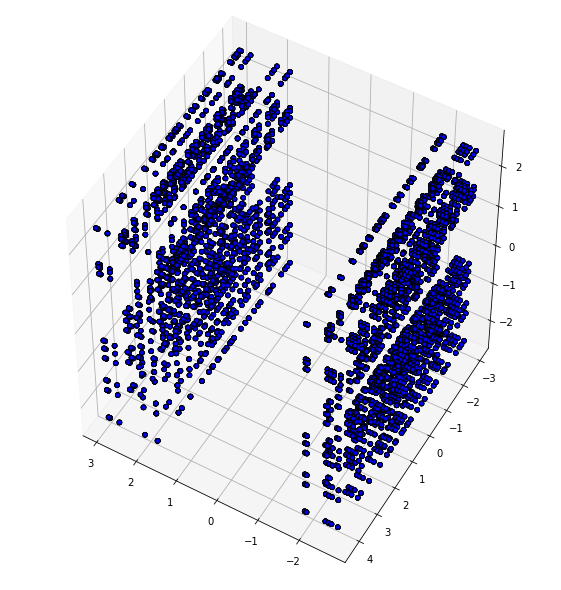

In [144]:
visualize2D(X)
visualize3D(X)

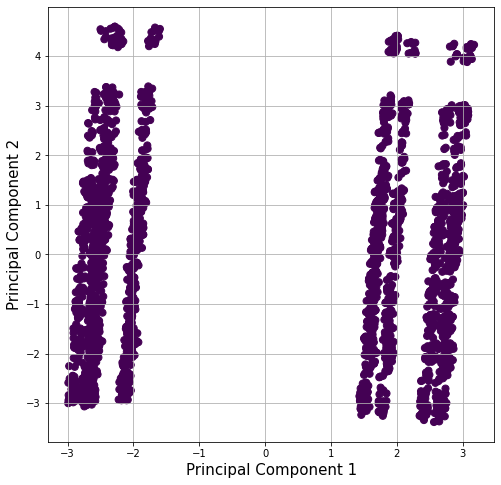

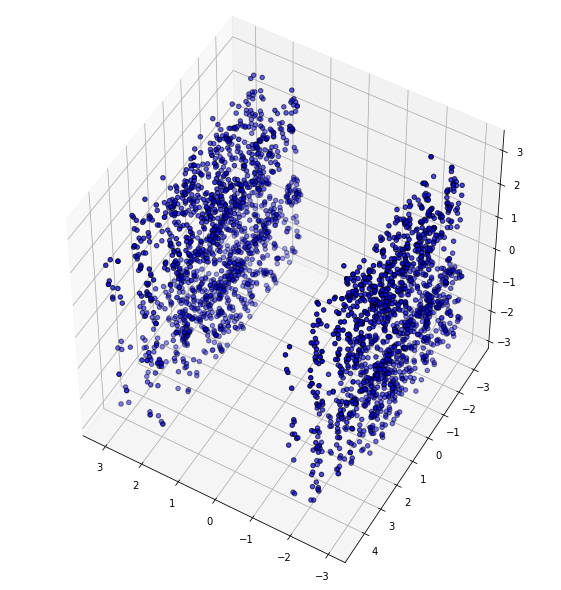

In [145]:
X1 = createSubSet(X, 3000)
visualize2D(X1)
visualize3D(X1)


In [157]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X1)

In [158]:
kmedoids.labels_

array([1, 0, 0, ..., 1, 1, 0])

In [159]:
kmedoids.cluster_centers_

array([[-0.06953761, -0.72246747, -0.2924555 ,  0.10836568,  0.30809963,
        -0.7791425 , -0.21986577,  0.11681878, -0.10549028, -0.0034729 ,
        -1.16887229, -0.40482677, -0.61076569, -0.18414314, -1.14333335,
        -1.17802268, -0.38081082, -1.47249159,  0.77625728, -0.75747032,
        -1.0114818 , -0.96356175, -0.82315954,  1.05066965,  1.06109861,
         0.        ,  0.        ,  0.        ,  0.38628025,  0.71116372,
         1.28541597,  0.01194771],
       [-0.06953761, -0.72246747, -0.2924555 ,  0.10836568,  0.30809963,
        -0.7791425 , -0.21986577,  0.11681878, -0.10549028, -0.0034729 ,
        -1.16887229, -0.40482677,  1.17005815, -0.267837  ,  0.77417228,
         1.04426558,  0.37341644,  0.62670057, -0.09250734,  1.15357396,
         1.00708608,  0.97335209,  0.98554434, -0.75038782, -1.03847505,
         0.        ,  0.        ,  0.        ,  0.8189168 , -0.25908525,
        -0.16758666,  1.12655301]])

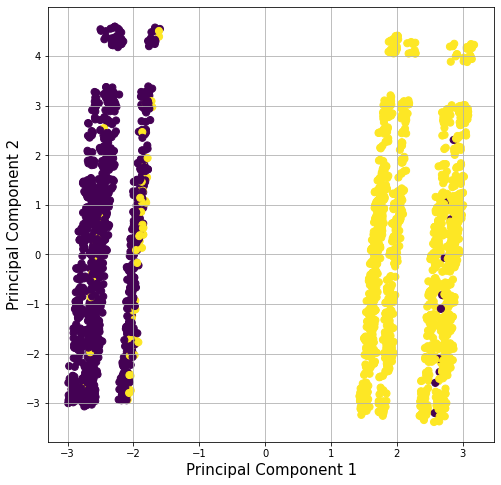

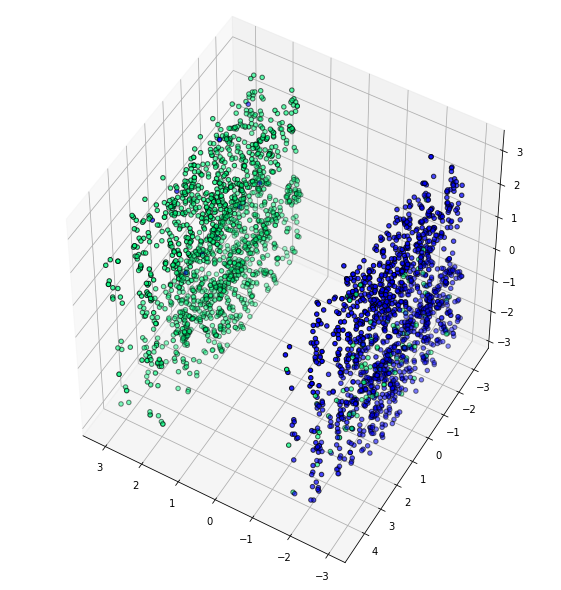

In [160]:
visualize2D(X1, kmedoids.labels_)
visualize3D(X1, kmedoids.labels_)

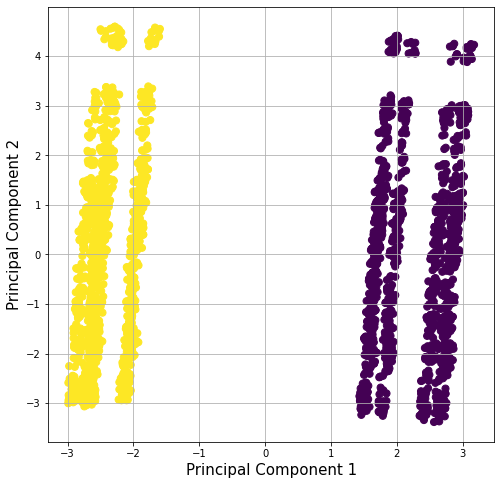

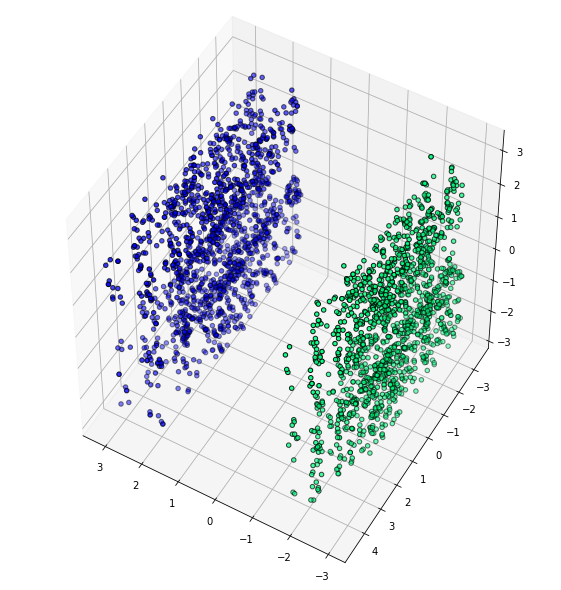

In [161]:
from sklearn.cluster import KMeans
km = KMeans(2)
clusts = km.fit_predict(X1)
visualize2D(X1, clusts)
visualize3D(X1, clusts)